# 👩‍🔬 Dataset Breast Câncer e KNN

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

data = load_breast_cancer()
X = data.data
y = data.target

# Divisão dos dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=9)

# Validação Cruzada
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Acurácia por fold: {cv_scores}")         
print(f"Acurácia média: {cv_scores.mean()}") 

Acurácia por fold: [0.95604396 0.94505495 0.98901099 0.95604396 0.92307692]
Acurácia média: 0.9538461538461538


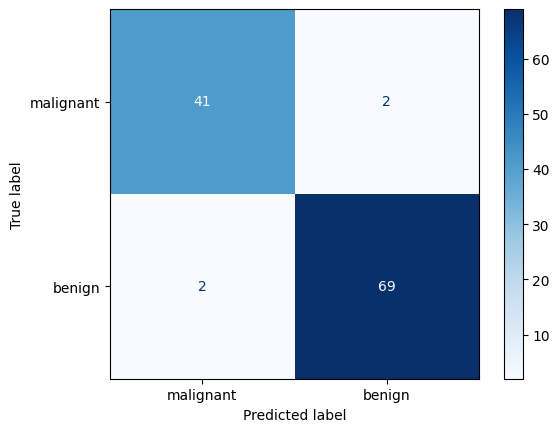

In [10]:
# Treinar no conjunto de treino completo e testar
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')

In [11]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Relatório de Classificação:
              precision    recall  f1-score   support

   malignant       0.95      0.95      0.95        43
      benign       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Testar diferentes valores de K

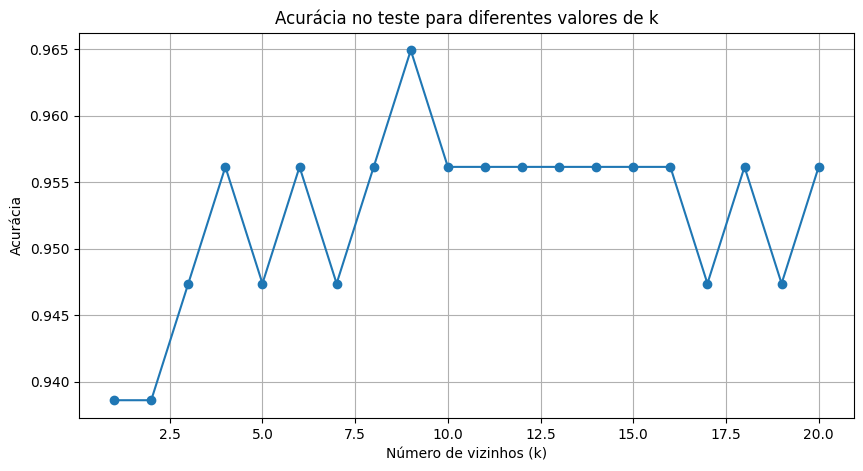

In [12]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Acurácia no teste para diferentes valores de k")
plt.xlabel("Número de vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()
